# 1D Lattice Boltzmann Examples

The following examples use a transient heat flux problem found in geodynamics, arising from the cooling of oceanic lithosphere. The solution is an error function which we implement using the scipy special libraries.

In [1]:
import planet_LB as p_LB
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

# Initialise constants and object
M2S = p_LB.Myr2s
pLB = p_LB.planet_LB()


# Problem setup

In [2]:
#Time discretisation
age = 50 #Age in Myrs
tstep=2000 #Number of timesteps
dt = age*M2S/tstep

#Mesh discretisation
m=400  # Number of x divisions
dx=500.0 #Size of grid spacing


#Initial/boundary and heating properties
H=0. # internal heat production
Tinit = 1300 # Initial temperature
TSurf = 0.0 #Surface temperature

In [10]:
# Simulation 1

LBS = pLB.init_1D_LB(dt,dx,tstep,m,Tinit,TSurf,H)
x=LBS['x']
T=pLB.LB1D(LBS)
# Simulation II - an oceanic crust made up of granite in the top 10km, with mantle heat production beneath that:
# Heat production. 
H1 = np.ones_like(x) * 1e-12  #Note H is now being used as an array - can be constant or x-like array
H1[ x <= 10e3] = 9.7e-9

# Note H(W/kg)*dens = W/m3 = qg.
# Source S = qg/dens*C --> H*dens/dens*Cp --> H/Cp
Cp = 1000.0
H1 /= Cp

LBS1 = pLB.init_1D_LB(dt,dx,tstep,m,Tinit,TSurf,H1)
T1=pLB.LB1D(LBS1)
x1=LBS1['x']

In [11]:
# Simulation III

H=0.
age10 = 10
dt10 = age10*M2S/tstep

LBS10 = pLB.init_1D_LB(dt10,dx,tstep,m,Tinit,TSurf,H)
x10=LBS10['x']
T10=pLB.LB1D(LBS10)

# Visualising the result

In [12]:
K=1e-6

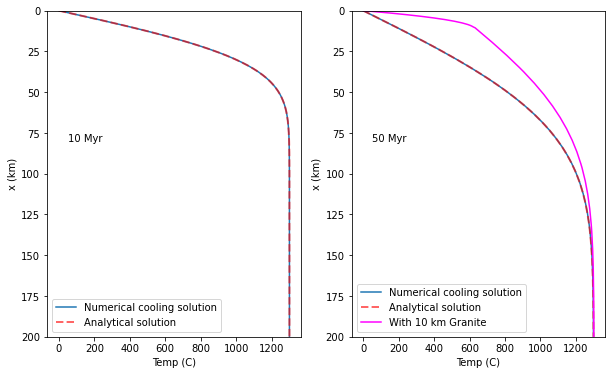

In [13]:
plt.figure(figsize=(10,6))


plt.subplot(1,2,2)
plt.plot(T,x/1e3,label="Numerical cooling solution")
plt.xlabel("Temp (C)")
plt.ylabel("x (km)")
plt.ylim(np.max(x/1e3),0)
#plt.xlim(0,np.max(T)+10)
#sol = (-T1*special.erfc(x/(2*np.sqrt(alpha*dt*mstep)))) + T1
sol = (Tinit*special.erf(x/(2*np.sqrt(K*dt*tstep))))
#print "Analytical solution: ", sol, "Time: ",dt*mstep/(60*60*24*365.25*1e6)
plt.plot(sol,x/1e3,'r--',linewidth=2,alpha=0.6,label="Analytical solution")
plt.plot(T1,x1/1e3,color="magenta",label="With 10 km Granite")
plt.annotate(str(age)+" Myr",xytext=(50,80),xy=(50,80))
plt.legend()

plt.subplot(1,2,1)

plt.xlabel("Temp (C)")
plt.ylabel("x (km)")
plt.ylim(np.max(x/1e3),0)
plt.plot(T10,x10/1e3,label="Numerical cooling solution")
#plt.xlim(0,np.max(T)+10)
#sol = (-T1*special.erfc(x/(2*np.sqrt(alpha*dt*mstep)))) + T1
sol = (Tinit*special.erf(x10/(2*np.sqrt(K*dt10*tstep))))
#print "Analytical solution: ", sol, "Time: ",dt*mstep/(60*60*24*365.25*1e6)
plt.plot(sol,x10/1e3,'r--',linewidth=2,alpha=0.6,label="Analytical solution")
#plt.plot(T3,x3/1e3,color="magenta",label="10 km Granite")
plt.annotate(str(age10)+" Myr",xytext=(50,80),xy=(50,80))
plt.legend()
